# Lab 3 - Naive Bayes and KNN
Here, we are going to analyse two models: Naive Bayes and KNN

Observation: to test them, it's going to be used **k fold cross-validation** with repetition (RepeatedStratifiedKFold), because of the low number of records of the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold
import sklearn.metrics as metrics
import itertools
import matplotlib.pyplot as plt

In [10]:
data: pd.DataFrame = pd.read_csv('datasets/pd_data_preparation.csv', sep=',', decimal='.', index_col='id')
y: np.ndarray = data.pop('class').values
X: np.ndarray = data.values
labels = pd.unique(y)

data.head()

,gender,PPE,DFA,RPDE,numPulses,stdDevPeriodPulses,locPctJitter,locShimmer,meanAutoCorrHarmonicity,minIntensity,...,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_30
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.916232,0.475707,0.590235,0.284974,0.022323,0.075900,0.271284,0.944323,0.692855,...,0.075621,0.300582,0.105270,0.013066,0.004055,0.003293,0.000374,0.000178,0.000191,0.098628
1,0.0,0.182314,0.806469,0.630075,0.242228,0.689703,0.247423,0.228818,0.876238,0.882924,...,0.072430,0.077755,0.174381,0.038398,0.008310,0.001114,0.001689,0.024783,0.018258,0.040204
2,1.0,0.877689,0.216841,0.516437,0.448187,0.033848,0.087255,0.117413,0.974092,0.871010,...,0.147429,0.038159,0.013139,0.007834,0.019385,0.000201,0.000368,0.000336,0.213153,0.120303
3,0.0,0.925807,0.237611,0.542708,0.785622,0.010547,0.021814,0.161006,0.983185,0.781731,...,0.016141,0.161223,0.097629,0.037870,0.020783,0.009404,0.018881,0.003916,0.000815,0.009216
4,0.0,0.930451,0.757013,0.842307,0.532383,0.754983,0.148962,0.722861,0.734980,0.497109,...,0.142211,0.230036,0.117364,0.022389,0.009184,0.006695,0.009538,0.010617,0.013877,0.010267


## Naive Bayes

In [3]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

CMAP = plt.cm.Blues

def plot_confusion_matrix(ax: plt.Axes, cnf_matrix: np.ndarray, classes_names: list, normalize: bool = False, title_complement = ''):
    if normalize:
        total = cnf_matrix.sum(axis=1)[:, np.newaxis]
        cm = cnf_matrix.astype('float') / total
        title = 'Normalized confusion matrix ' + title_complement
    else:
        cm = cnf_matrix
        title = 'Confusion matrix ' + title_complement
    np.set_printoptions(precision=2)
    tick_marks = np.arange(0, len(classes_names), 1)
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes_names)
    ax.set_yticklabels(classes_names)
    ax.imshow(cm, interpolation='nearest', cmap=CMAP)

    fmt = '.2f' if normalize else 'd'
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt), horizontalalignment="center")

Accuracy for: GaussianNB : 0.7828


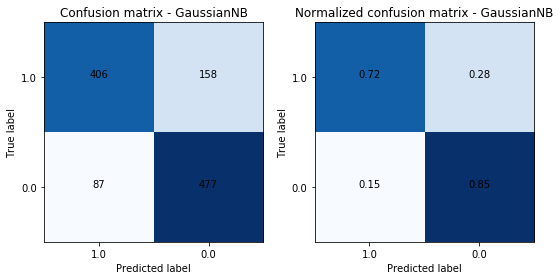

Accuracy for: MultinomialNB : 0.7349


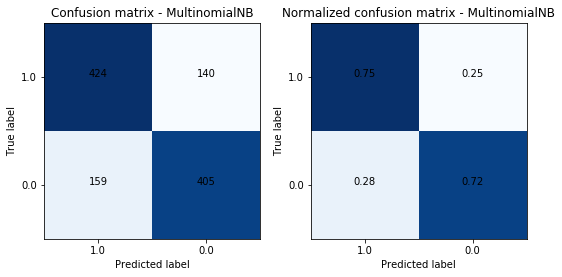

Accuracy for: BernoulyNB : 0.5390


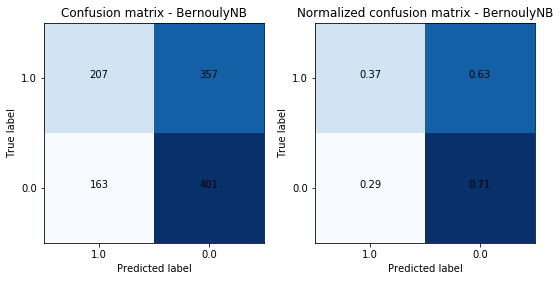

In [11]:
estimators = {'GaussianNB': GaussianNB(), 
              'MultinomialNB': MultinomialNB(), 
              'BernoulyNB': BernoulliNB()}
accuracy = {}
cnf_mtx = {}
for clf in estimators:
    accuracy[clf] = 0
    cnf_mtx[clf] = np.zeros((2, 2)).astype(int)

n_splits = 4
n_repeats = 3

rskf = RepeatedStratifiedKFold(n_splits, n_repeats, random_state=42)

for train_index, test_index in rskf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    for clf in estimators:
        estimators[clf].fit(X_train, y_train)
        prdY = estimators[clf].predict(X_test)
        accuracy[clf] += metrics.accuracy_score(y_test, prdY)
        cnf_mtx[clf] += metrics.confusion_matrix(y_test, prdY, labels)
for acc in accuracy:
    accuracy[acc] /= n_splits*n_repeats
    print("Accuracy for:", acc, ':', format(accuracy[acc], '.4f'))
    fig, axs = plt.subplots(1, 2, figsize=(8, 4), squeeze=False)
    plot_confusion_matrix(axs[0, 0], cnf_mtx[acc], labels, title_complement=('- ' + acc))
    plot_confusion_matrix(axs[0, 1], cnf_mtx[acc], labels, normalize=True, title_complement=('- ' + acc))
    plt.tight_layout()
    plt.show()

So, we can use the Gaussian Naive Bayes (with 4 folds and 3 repetitions) as our baseline, with accuracy around 0,7828.

## KNN

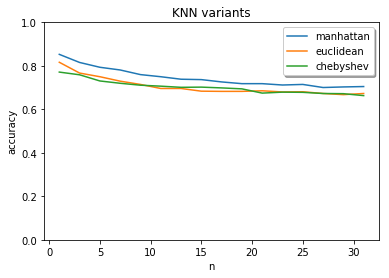

In [53]:
from sklearn.neighbors import KNeighborsClassifier

def multiple_line_chart(ax: plt.Axes, xvalues: list, yvalues: dict, title: str, xlabel: str, ylabel: str, percentage=False):
    legend: list = []
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if percentage:
        ax.set_ylim(0.0, 1.0)

    for name, y in yvalues.items():
        ax.plot(xvalues, y)
        legend.append(name)
    ax.legend(legend, loc='best', fancybox = True, shadow = True)

n_splits = 4
n_repeats = 3
nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]
dist = ['manhattan', 'euclidean', 'chebyshev']
values = {}
for d in dist:
    values[d] = np.zeros(len(nvalues))

rskf = RepeatedStratifiedKFold(n_splits, n_repeats, random_state=42)

for train_index, test_index in rskf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    for d in dist:
        yvalues = []
        for n in nvalues:
            knn = KNeighborsClassifier(n_neighbors=n, metric=d)
            knn.fit(X_train, y_train)
            prdY = knn.predict(X_test)
            yvalues.append(metrics.accuracy_score(y_test, prdY))
        values[d] += yvalues
for d in dist:
    values[d] /= (n_splits*n_repeats)
plt.figure()
multiple_line_chart(plt.gca(), nvalues, values, 'KNN variants', 'n', 'accuracy', percentage=True)
plt.show()

Manhattan distance resulted in the best accuracy, especially with lower numbers of neighbours.

In [54]:
for aux in range(len(values['manhattan'])):
    print('Accuracy for n equal to', nvalues[aux], ':', format(values['manhattan'][aux], '.4f'))

Accuracy for n equal to 1 : 0.8528
Accuracy for n equal to 3 : 0.8156
Accuracy for n equal to 5 : 0.7934
Accuracy for n equal to 7 : 0.7810
Accuracy for n equal to 9 : 0.7598
Accuracy for n equal to 11 : 0.7500
Accuracy for n equal to 13 : 0.7385
Accuracy for n equal to 15 : 0.7367
Accuracy for n equal to 17 : 0.7261
Accuracy for n equal to 19 : 0.7181
Accuracy for n equal to 21 : 0.7181
Accuracy for n equal to 23 : 0.7119
Accuracy for n equal to 25 : 0.7145
Accuracy for n equal to 27 : 0.7004
Accuracy for n equal to 29 : 0.7030
Accuracy for n equal to 31 : 0.7048
